# Computational Social Science Project #2 

**Enter your Name:** Autumn Mitchell

*Semester:* Fall 2023


Below we fill in some of the code you might use to answer some of the questions. Here are some additional resources for when you get stuck:
* Code and documentation provided in the course notebooks  
* [Markdown cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) to help with formatting the Jupyter notebook
* Try Googling any errors you get and consult Stack Overflow, etc. Someone has probably had your question before!
* Send me a pull request on GitHub flagging the syntax that's tripping you up 

**INSTRUCTIONS:** For this project, copy all of the files in the Project 2 folder in the course repo into a "Project 2" subfolder within the "Computational Social Science Projects" directory that you created for the first project. You will work on the project locally, push your project to GitHub, and submit a link to the GitHub repo on bCourses by the project deadline. Be sure the final submission is in the main branch, which is what I'll pull down and re-run to grade. 

## 1. Introduction/Setup

#### a) Import relevant libraries
Here are some libraries you will need to get started. Along the way you may need to add more. Best practice is to add them here at the top of the script.

In [3]:
#
# import libraries you might need here 
#-----------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# use random seed for consistent results 
np.random.seed(273)

#### b) Read in and inspect data frame 
Read in the data frame and look at some of its attributes. Read in the data contained in the projoect folder: "Diabetes with Population Info by County 2017.csv".

In [4]:
#
# read in and inspect data frame
#-----------
# Note that "CountyFips" needs to be a string so the leading 0 isn't dropped (only if you want to make choropleth map) 
diabetes = pd.read_csv("Diabetes with Population Info by County 2017.csv", 
                       dtype={"CountyFIPS": str}) 
diabetes.head()

County    State CountyFIPS Diabetes_Number Obesity_Number  \
0  Autauga County  Alabama      01001            5178          13489   
1  Baldwin County  Alabama      01003           16707          48542   
2  Barbour County  Alabama      01005            3400           8009   
3     Bibb County  Alabama      01007            2371           6534   
4   Blount County  Alabama      01009            6282          14227   

  Physical_Inactivity_Number  \
0                      12525   
1                      40024   
2                       5431   
3                       5827   
4                      14365   

  sex and age_total population_65 years and over_sex ratio (males per 100 females)  \
0                                               76.5                                 
1                                               86.6                                 
2                                               76.2                                 
3                                               80.5                                 
4                                               79.7                                 

   race_total population  race_total population_one race  \
0                  55200                           54170   
1                 208107                          204535   
2                  25782                           25429   
3                  22527                           22340   
4                  57645                           56710   

   race_total population_two or more races  ...  \
0                                     1030  ...   
1                                     3572  ...   
2                                      353  ...   
3                                      187  ...   
4                                      935  ...   

   sex and age_total population_21 years and over  \
0                                           39614   
1                                          155502   
2                                           19394   
3                                           16864   
4                                           42232   

   sex and age_total population_62 years and over  \
0                                            9403   
1                                           49811   
2                                            5658   
3                                            4323   
4                                           12400   

   sex and age_total population_65 years and over  \
0                                            8050   
1                                           40665   
2                                            4634   
3                                            3661   
4                                           10233   

   sex and age_total population_18 years and over_1  \
0                                             41831   
1                                            162430   
2                                             20346   
3                                             17868   
4                                             44177   

   sex and age_total population_18 years and over_male  \
0                                              20054     
1                                              78104     
2                                              10923     
3                                               9578     
4                                              21595     

   sex and age_total population_18 years and over_female  \
0                                              21777       
1                                              84326       
2                                               9423       
3                                               8290       
4                                              22582       

   sex and age_total population_18 years and over_sex ratio (males per 100 females)  \
0                                               92.1                                  
1                           

In [5]:
#
# look at shape
#-----------
# look at the dimensions of the diabetes data frame
print('shape: ', diabetes.shape)

shape:  (3220, 95)


In [6]:
#
# set pandas parameters
#-----------
# tells pandas how many rows to display when printing so results don't get truncated
pd.set_option('display.max_rows', 100)

# look at the data types for each column in diabetes df (likely be located under each row bc column names are long)
print('data types:', diabetes.dtypes)

data types: County                                                                                                                                                   object
State                                                                                                                                                    object
CountyFIPS                                                                                                                                               object
Diabetes_Number                                                                                                                                          object
Obesity_Number                                                                                                                                           object
Physical_Inactivity_Number                                                                                                                               object
sex and age_total population

Immediately, we see that some of the features that should be numeric (e.g., Diabetes_Number, Obesity_Number,  and Physical_Inactivity_Number) are not. We can check to see what the non-numeric values are in a column where we are expecting numeric information with a combination of `str.isnumeric()` and `unique()`.

In [7]:
#
# identify non-numeric features
#-----------
# Return rows where the column "Diabetes_Number" is non-numeric and get the unique values of these rows
# the "~" below in front of diabetes negates the str.isnumeric() so it only takes non-numeric values
print(diabetes[~diabetes["Diabetes_Number"].str.isnumeric()]["Diabetes_Number"].unique()) 

['Suppressed']


In [8]:
#
# Now do the same as above, but for "Obesity_Number"
#-----------

print(diabetes[~diabetes["Obesity_Number"].str.isnumeric()]["Obesity_Number"].unique()) 

['No Data']


In [9]:
#
# Now do the same as above, but for "Physical_Inactivity_Number" 
#-----------

print(diabetes[~diabetes["Physical_Inactivity_Number"].str.isnumeric()]["Physical_Inactivity_Number"].unique()) 

['No Data']


These values ("Suppresssed" and "No Data") contained in the two respective columns are coercing these features to objects instead of them being  integers. Let's drop those rows in the next section, and also recode "Physical_Inactivity_Number" feature to be an integer.

#### c. Recode variables

Convert 'Diabetes_Number', 'Obesity_Number', and 'Physical_Inactivity_Number' to integers below so we can use them in our analysis. Also fill in the object type we want to recode 'sex and age_total population_65 years and over_sex ratio (males per 100 females)' too (you'll have to scroll all the way over to the right).

In [10]:
#
# Recode variables
#-----------

# Diabetes
# ----------
# keep only useful info about our target feature, i.e., where diabetes_number not = 'Suppressed'
# note that the inside reference to the diabetes df identifies the column, and the outer calls specific rows according to a condition 
diabetes = diabetes[diabetes['Diabetes_Number']!="Suppressed"] 

# use the astype method on Diabetes_Number to convert it to an integer...if you are not sure, what does the astype() documentation tell you are possible arguments? 
diabetes['Diabetes_Number'] = diabetes['Diabetes_Number'].astype(int) 


# Obesity
diabetes = diabetes[diabetes['Obesity_Number']!="No Data"]
diabetes['Obesity_Number'] = diabetes['Obesity_Number'].astype(int) 

# Physical Inactivity
diabetes = diabetes[diabetes['Physical_Inactivity_Number']!="No Data"]
diabetes['Physical_Inactivity_Number'] = diabetes['Physical_Inactivity_Number'].astype(int) 


# Some final changes 
# ----------
# 65+ sex ratio had one "-" in it so let's drop that row first
diabetes = diabetes[diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)']!= "-"]

# change to numeric from string, since it originally included the "-", which made it a string
# you'll have to decide whether to make it integer or float 
diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'] = diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'].astype(float)

We should probably scale our count variables to be proportional to county population. We create the list 'rc_cols' to select all the features we want to rescale, and then use the `.div()` method to avoid typing out every single column we want to recode. 

In [11]:
#
# Scale to county populations
#-----------

# select count variables to recode to percentages; make sure we leave out ratios and our population variable 
# because these don't make sense to scale by population
rc_cols = [col for col in diabetes.columns if col not in ['County', 'State', 'CountyFIPS', 
                                                        'sex and age_total population_65 years and over_sex ratio (males per 100 females)', 
                                                        'sex and age_total population_sex ratio (males per 100 females)', 
                                                        'sex and age_total population_18 years and over_sex ratio (males per 100 females)',  
                                                        'race_total population']]
           
# recode all selected columns to numeric
diabetes[rc_cols] = diabetes[rc_cols].apply(pd.to_numeric, errors='coerce') 

# divide all columns but those listed above by total population to calculate rates
diabetes[rc_cols] = diabetes[rc_cols].div(diabetes['race_total population'], axis=0)


Let's check our work. Are all rates bounded by 0 and 1 as expected? 

In [12]:
#
# check
#-----------
# set pandas options
pd.set_option('display.max_columns', None)

# inspect recoded values
diabetes_summary = diabetes.describe().transpose() # note we use the transpose method rather than .T because this object is not a numpy array
  
# check recoding 
with pd.option_context('display.max_rows', 100, 'display.max_columns', None): 
    display(diabetes_summary.iloc[ : ,[0,1,3,7]]) # select which columns in the summary table we want to present

count           mean  \
Diabetes_Number                                     3112.0       0.092857   
Obesity_Number                                      3112.0       0.251666   
Physical_Inactivity_Number                          3112.0       0.200861   
sex and age_total population_65 years and over_...  3112.0      84.275643   
race_total population                               3112.0  103682.624036   
race_total population_one race                      3112.0       0.976059   
race_total population_two or more races             3112.0       0.023941   
race_total population_one race_1                    3112.0       0.976059   
race_total population_one race_white                3112.0       0.831107   
race_total population_one race_black or african...  3112.0       0.090215   
race_total population_one race_american indian ...  3112.0       0.019398   
race_total population_one race_american indian ...  3112.0       0.001791   
race_total population_one race_american indian ...  3112.0       0.001338   
race_total population_one race_american indian ...  3112.0       0.001229   
race_total population_one race_american indian ...  3112.0       0.003315   
race_total population_one race_asian                3112.0       0.013749   
race_total population_one race_asian_asian indian   3112.0       0.002628   
race_total population_one race_asian_chinese        3112.0       0.002644   
race_total population_one race_asian_filipino       3112.0       0.002744   
race_total population_one race_asian_japanese       3112.0       0.000707   
race_total population_one race_asian_korean         3112.0       0.001174   
race_total population_one race_asian_vietnamese     3112.0       0.001255   
race_total population_one race_asian_other asian    3112.0       0.002598   
race_total population_one race_native hawaiian ...  3112.0       0.000874   
race_total population_one race_native hawaiian ...  3112.0       0.000303   
race_total population_one race_native hawaiian ...  3112.0       0.000142   
race_total population_one race_native hawaiian ...  3112.0       0.000134   
race_total population_one race_native hawaiian ...  3112.0       0.000295   
race_total population_one race_some other race      3112.0       0.020716   
race_total population_two or more races_1           3112.0       0.023941   
race_total population_two or more races_white a...  3112.0       0.006444   
race_total population_two or more races_white a...  3112.0       0.008618   
race_total population_two or more races_white a...  3112.0       0.003021   
race_total population_two or more races_black o...  3112.0       0.000652   
race alone or in combination with one or more o...  3112.0       1.000000   
race alone or in combination with one or more o...  3112.0       0.852907   
race alone or in combination with one or more o...  3112.0       0.098875   
race alone or in combination with one or more o...  3112.0       0.029923   
race alone or in combination with one or more o...  3112.0       0.018213   
race alone or in combination with one or more o...  3112.0       0.002067   
race alone or in combination with one or more o...  3112.0       0.023626   
hispanic or latino and race_total population        3112.0       1.000000   
hispanic or latino and race_total population_hi...  3112.0       0.093201   
hispanic or latino and race_total population_hi...  3112.0       0.069331   
hispanic or latino and race_total population_hi...  3112.0       0.005656   
hispanic or latino and race_total population_hi...  3112.0       0.001568   
hispanic or latino and race_total population_hi...  3112.0       0.016645   
hispanic or latino and race_total population_no...  3112.0       0.906799   
hispanic or latino and race_total population_no...  3112.0       0.765065   
hispanic or latino and race_total population_no...  3112.0       0.088817   
hispanic or latino and race_total population_no...  3112.0       0.018016   
hispanic or latino and race_total population_no..

#### d. Check for duplicate columns

There are a lot of columns in this data frame. Let's see if there are any are duplicates. Note that Pandas will not allow them to have the same exact column name, so they will likely be distinct on column name but will be copies otherwise.

In [13]:
#
# Check for duplicate columns
#-----------
# I used Google to figure this out, and adapted this example for our purposes:  
# source: https://thispointer.com/how-to-find-drop-duplicate-columns-in-a-dataframe-python-pandas/ 
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

duplicateColumnNames = list(getDuplicateColumns(diabetes))
print('Duplicate Columns are as follows: ')
duplicateColumnNames

Duplicate Columns are as follows: 


['sex and age_total population_18 years and over_1',
 'sex and age_total population',
 'race_total population_two or more races_1',
 'hispanic or latino and race_total population',
 'race_total population_one race_1',
 'sex and age_total population_65 years and over_1']

In [14]:
#
# drop columns from duplicates list
#-----------
# now drop list of duplicate features from our df using the .drop() method
diabetes = diabetes.drop(columns=duplicateColumnNames) 


Finally, there are many states accounted for the in dataset. If we convert this column to a categorical variable, and create dummies, it will create a rather sparse matrix (many 0s in our dataset) becuase there will be 49 dummy variables. One alternative is to classify each state to a larger US region and use that variable instead of state. The following code will do that.

In [15]:
# Define a dictionary mapping states to regions
state_to_region = {
    'Alabama': 'Southeast',
    'Alaska': 'West',
    'Arizona': 'West',
    'Arkansas': 'South',
    'California': 'West',
    'Colorado': 'West',
    'Connecticut': 'Northeast',
    'Delaware': 'Northeast',
    'District of Columbia': 'Southeast',
    'Florida': 'Southeast',
    'Georgia': 'Southeast',
    'Hawaii': 'West',
    'Idaho': 'West',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',
    'Kentucky': 'South',
    'Louisiana': 'South',
    'Maine': 'Northeast',
    'Maryland': 'Northeast',
    'Massachusetts': 'Northeast',
    'Michigan': 'Midwest',
    'Minnesota': 'Midwest',
    'Mississippi': 'South',
    'Missouri': 'Midwest',
    'Montana': 'West',
    'Nebraska': 'Midwest',
    'Nevada': 'West',
    'New Hampshire': 'Northeast',
    'New Jersey': 'Northeast',
    'New Mexico': 'West',
    'New York': 'Northeast',
    'North Carolina': 'Southeast',
    'North Dakota': 'Midwest',
    'Ohio': 'Midwest',
    'Oklahoma': 'South',
    'Oregon': 'West',
    'Pennsylvania': 'Northeast',
    'Rhode Island': 'Northeast',
    'South Carolina': 'Southeast',
    'South Dakota': 'Midwest',
    'Tennessee': 'South',
    'Texas': 'South',
    'Utah': 'West',
    'Vermont': 'Northeast',
    'Virginia': 'Southeast',
    'Washington': 'West',
    'West Virginia': 'South',
    'Wisconsin': 'Midwest',
    'Wyoming': 'West'
}

# Add a new 'Region' column based on the mapping
diabetes['Region'] = diabetes['State'].map(state_to_region)

# Print to verify'Region' column has been added
diabetes


County    State CountyFIPS  Diabetes_Number  Obesity_Number  \
0        Autauga County  Alabama      01001         0.093804        0.244366   
1        Baldwin County  Alabama      01003         0.080281        0.233255   
2        Barbour County  Alabama      01005         0.131875        0.310643   
3           Bibb County  Alabama      01007         0.105251        0.290052   
4         Blount County  Alabama      01009         0.108977        0.246804   
...                 ...      ...        ...              ...             ...   
3215  Sweetwater County  Wyoming      56037         0.058028        0.212208   
3216       Teton County  Wyoming      56039         0.019038        0.088946   
3217       Uinta County  Wyoming      56041         0.069872        0.238973   
3218    Washakie County  Wyoming      56043         0.078361        0.213802   
3219      Weston County  Wyoming      56045         0.084648        0.283803   

      Physical_Inactivity_Number  \
0                       0.226902   
1                       0.192324   
2                       0.210651   
3                       0.258667   
4                       0.249198   
...                          ...   
3215                    0.170410   
3216                    0.086951   
3217                    0.170751   
3218                    0.210112   
3219                    0.194789   

      sex and age_total population_65 years and over_sex ratio (males per 100 females)  \
0                                                  76.5                                  
1                                                  86.6                                  
2                                                  76.2                                  
3                                                  80.5                                  
4                                                  79.7                                  
...                                                 ...                                  
3215                                               92.0                                  
3216                                               94.8                                  
3217                                               97.6                                  
3218                                               89.0                                  
3219                                               90.6                                  

      race_total population  race_total population_one race  \
0                     55200                        0.981341   
1                    208107                        0.982836   
2                     25782                        0.986308   
3                     22527                        0.991699   
4                     57645                        0.983780   
...                     ...                             ...   
3215                  44117                        0.979804   
3216                  23059                        0.992020   
3217                  20609                        0.965161   
3218                   8129                        0.958420   
3219                   7100                        0.979718   

      race_total population_two or more races  \
0                                    0.018659   
1                                    0.017164   
2                                    0.013692   
3                                    0.008301   
4                                    0.016220   
...                                       ...   
3215                                 0.020196   
3216                                 0.007980   
3217                                 0.034839   
3218                                 0.041580   
3219                                 0.020282   

      race_total population_one race_white  \
0                                 0.768786   
1                                 0.862662   
2                                 0.473819   
3           

## 2. Exploratory Data Analysis

Make at least two figures (feel free to make more) and explain their relevance to the scientific problem. The goal here is to uncover interesting patterns in the data, learn more about the scope of the problem, and communicate these findings to your audience in clear ways.

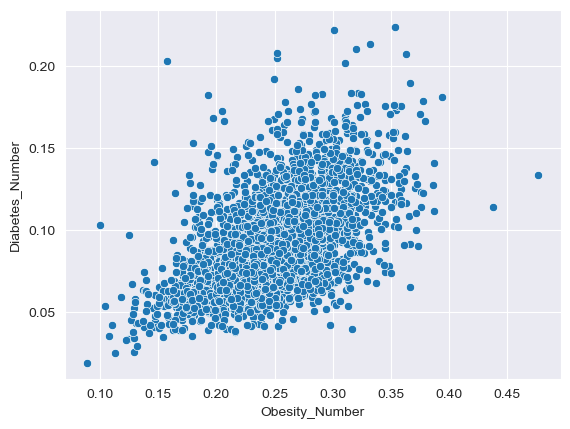

In [16]:
#
# EDA #1 and interpretations in this section 

# set style
sns.set_style("darkgrid")

sns.scatterplot(x = "Obesity_Number",
                y = "Diabetes_Number",
                data = diabetes);


The scatterplot above allows us to visualize the relationship between the proportion of people with Obesity and the proportion of people with diabetes. We see a positive correlation between these variables, suggesting that there might be a relationship -- perhaps a causal relationship -- between them. Given current medical knowledge, we can theorize that obesity increases the likelihood of diabetes, and that this causal dynamic might be reflected in the data. To combat diabetes, policies that combat obesity might be beneficial. 

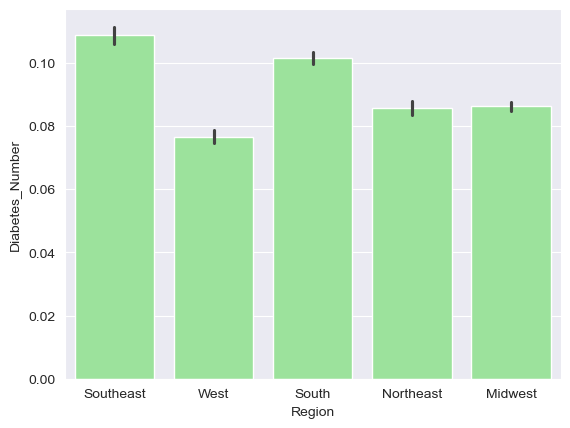

In [17]:
#
# EDA #2 and interpretations in this section 

sns.barplot(x = "Region", 
            y = "Diabetes_Number", 
            data = diabetes, 
            color = "lightgreen");


## 3. Prepare to Fit Models

The barplot above allows us to visualize the relationship between region and diabetes prevalence. The southeast seems to have the largest frequency of diabetes cases. This might be becuase of the relative poverty of the region along with its heavy fat diet. These two regional factors are likely to have negative impacts on population health. Given this high occurence of diabetes in the southeast, it might be advisable to target diabetes information campaigns to particular regions with the highest prevalence of diabetes. 

# 3. Prepare to Fit Models
### 3.1 Finalize Data Set

We've already cleaned up the data, but we can make a few more adjustments before partitioning the data and training models. Let's recode 'Region' to be a categorical variable using `pd.get_dummies` and drop 'State'. Also, we'll drop 'County' because 'CountyFIPS' is already a unique identifier for the county. 

In [18]:
#
# Drop and get dummies
#-----------

# create dummy features out of 'Region', which might be related to diabetes rates 
diabetes_clean = pd.get_dummies(data=diabetes, 
                               columns = ["Region"],  
                               drop_first = True) # drop the first as a reference 

# drop 'County' and 'State' variables
diabetes_clean = diabetes_clean.drop(labels = ['County', 'State'],
                               axis = 1) # which axis tells python we want to drop columns rather than index rows?

# look at first 10 rows of new data frame 
diabetes_clean.head() 

CountyFIPS  Diabetes_Number  Obesity_Number  Physical_Inactivity_Number  \
0      01001         0.093804        0.244366                    0.226902   
1      01003         0.080281        0.233255                    0.192324   
2      01005         0.131875        0.310643                    0.210651   
3      01007         0.105251        0.290052                    0.258667   
4      01009         0.108977        0.246804                    0.249198   

   sex and age_total population_65 years and over_sex ratio (males per 100 females)  \
0                                               76.5                                  
1                                               86.6                                  
2                                               76.2                                  
3                                               80.5                                  
4                                               79.7                                  

   race_total population  race_total population_one race  \
0                  55200                        0.981341   
1                 208107                        0.982836   
2                  25782                        0.986308   
3                  22527                        0.991699   
4                  57645                        0.983780   

   race_total population_two or more races  \
0                                 0.018659   
1                                 0.017164   
2                                 0.013692   
3                                 0.008301   
4                                 0.016220   

   race_total population_one race_white  \
0                              0.768786   
1                              0.862662   
2                              0.473819   
3                              0.766547   
4                              0.955052   

   race_total population_one race_black or african american  \
0                                           0.191395          
1                                           0.094970          
2                                           0.475758          
3                                           0.222755          
4                                           0.014954          

   race_total population_one race_american indian and alaska native  \
0                                           0.002880                  
1                                           0.007314                  
2                                           0.002793                  
3                                           0.000355                  
4                                           0.002446                  

   race_total population_one race_american indian and alaska native_cherokee tribal grouping  \
0                                           0.001486                                           
1                                           0.001369                                           
2                                           0.001008                                           
3                                           0.000000                                           
4                                           0.000347                                           

   race_total population_one race_american indian and alaska native_chippewa tribal grouping  \
0                                                0.0                                           
1                                                0.0                                           
2                                                0.0                                           
3                                                0.0                                           
4                                                0.0                                           

   race_total population_one race_american indian and alaska native_navajo tribal grouping  \
0                                           0.000797             

### 3.2 Partition Data, Feature Selection, and Standardization

Now, we will partition our data to prepare it for the training process. Ultimately we want to use a 60% train—20% validation—20% test in this case. More data in the training set lowers bias, but then increases variance in the validation/test sets. Balancing between bias and variance with choice of these set sizes is important as we want to ensure that there is enough data to train on to get good predictions, but also want to make sure our hold-out sets are representative enough.

Work through partitioning the data into the test/train/validation sets in the chunks below. Be sure to that if you are using Ridge or LASSO, you Standardize the data. Where you do this in the workflow matters so be clear about where you are doing this and why. 

In [19]:
#
# Partition data
#-----------

# import library
from sklearn.model_selection import train_test_split

# create y dataframe 
y = diabetes_clean.Diabetes_Number

# create X dataframe (include everything except "Diabetes_Number", our target, 
# and "race alone or in combination with one or more other races_total population")
X = diabetes_clean.drop(["Diabetes_Number",
                   "race alone or in combination with one or more other races_total population"],
                  axis=1)

Investigate whether there are any features that you should remove prior to spliting and model fitting. You may also consider using plots and relationships you found in the EDA stage for this question. Be sure to justify your logic. 

In [20]:
#
# Feature selection
X = X.drop(["Region_West"],
           axis=1)


I removed the "Region_West" variable because it contains redundant information. If the observation is false for the other regions, then it must be true for "Region_West". The region removed is random, but one region should be removed to prevent this redundancy. This is because we must always drop a reference category for each of the dummies we make. Region was the only dummy made in this dataset. 

In [21]:
#
# Training/test split
#-----------

# set the random seed
np.random.seed(10)


# split the data so that it returns 4 values: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X,                 # specify training dataset
                                                    y,                 # specify test dataset
                                                    train_size=0.8,      # specify proportional split for training
                                                    test_size=0.2)       # specify proportional split for test

In [22]:
#
# Validation split
#-----------

# train_test_split returns 4 values: X_train, X_test, y_train, y_test, so how do we create a 60-20-20 train-validate-test split? 
X_train, X_validate, y_train, y_validate =  train_test_split(X_train,
                                                             y_train,
                                                             train_size=0.75,
                                                             test_size=0.25)

In [23]:
#
# Standardization
#-----------
# Given that we want to only standardize non-dichotomous variables, we need to find a 
# solution that will loop over only the columns we want to standardize. The code below
# identifies all non-dichotomous variables in our dataset and only standardizes those.

# load library and create instance of Standard Scaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


# identify non-dichotomous columns we want to transform
columns = list(X_test.select_dtypes(include=['number']).loc[:, X_test.nunique() > 2])

# use loop to transform training data for only columns we want to transform
for column in columns:
    X_train[column] = scaler.fit_transform(X_train[column].values.reshape(-1, 1)).flatten()

# use loop to transform validation data for only columns we want to transform
for column in columns:
    X_validate[column] = scaler.fit_transform(X_validate[column].values.reshape(-1, 1)).flatten()

# use loop to transform test data for only columns we want to transform
for column in columns:
    X_test[column] = scaler.fit_transform(X_test[column].values.reshape(-1, 1)).flatten()

## 4. Train Models

In this section, train your models. 

**Note that if you use Lasso, you will likely need to specify a very low penalty (e.g., an alpha of 0.001) because of convergence problems.**

### 4.1 Describe models

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem.

**MODEL DESCRIPTION(S):** 

##### Linear Regression (Ordinary Least Squares)
OLS regression is the simplest model run. A major pro of OLS models are their interpretability. When assumptions of OLS models are satisfied, the model will provide unbiased results. However, if features are correlated with one another the model will not work as well. Morevoer, because there is no feature selection, irrelevant features will remain in the model. This might lead to overfitting. 

##### Ridge Regression 
Ridge regression adds penalties to the size of feature coefficients. It employs L2 regularization. This will resolve some of the issues that arise with collinearity and will reduce the likelihood of overfitting. Unlike Lassso, however, feature coefficients are unlikely to be reduced to zero. Overall, ridge regression models reduce variance at the cost of bias increase (as there will always be variance-bias tradeoffs). Compared to OLS, ridge regression is less interpretable. Becuase there are likely to be many features in this dataset that are collinear it is likely that ridge regression will be the best option for this project. 

##### Lasso Regression
Like Ridge regression, Lasso regression also adds penalties to the size of feature coefficients. It employs L1 regularization. This means that it is more likely that some feature coefficients will be reduced to zero (and therefore will be eliminated from the model. Lasso regression models are good to use when working with high-dimensional data that contains features that are likely to be irrelevant to the prediction. In situations with lots of collinearity, however, Lasso models will arbitrarily selected one of the correlated features to keep. Like ridge regression, Lasso regression models reduce variance at the cost of bias increase. Compared to OLS, ridge regression is less interpretable.  


### 4.2 Train models

Train each model in the training set, and be sure to tune hyperparameters if appropriate. Report any relevant summary statistics from the training set, including how well each model fits the training data.

#### Model 1:  Linear Regression (OLS) 

In [24]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [25]:
#
# Model 1 training

# create a model
lin_reg = LinearRegression()

# fit the model
lin_model = lin_reg.fit(X_train, y_train)

# print model coefficients and intercepts
print(lin_model.coef_)
print(lin_model.intercept_)

[-5.50489768e-08  7.98703746e-03  7.14041977e-03  3.48232458e-03
  3.74265614e-04 -5.18142952e-03  5.18142952e-03 -5.06193637e-02
  4.62532184e-02  1.53793114e-02  1.09746642e-03 -1.60353828e-04
  6.86182767e-04  1.19045981e-03  1.28712282e-02  8.61232850e-03
  1.17207642e-02  1.09399022e-02  6.85389739e-03  3.69448412e-03
  4.18835852e-03  8.53315952e-03 -1.27159297e-03 -1.50054335e-03
  1.80268547e-04 -7.38169211e-04 -5.16061664e-04  2.64142593e-03
 -3.01216521e-03 -9.07447717e-03 -2.15878652e-03 -5.91353530e-04
  4.98145015e-03 -4.80418333e-02 -3.23625688e-02 -3.19875713e-02
 -3.87729099e-03 -1.41462676e-02  4.04355477e-03  4.61892042e-03
 -7.37740383e-04 -1.16901503e-04 -1.82636828e-04 -4.04355477e-03
  1.55795273e-02 -2.12649372e-02  2.45753656e-03 -2.87428556e-02
  5.43416873e-03  1.89019839e-04  2.70298376e-03  7.92175046e-05
  2.71577003e-03 -3.75385205e-04  1.41600469e-03  2.46219980e-03
 -5.03749507e-04  2.53002009e-03 -2.53002009e-03 -5.23688094e-03
 -2.37534133e-03 -2.27909

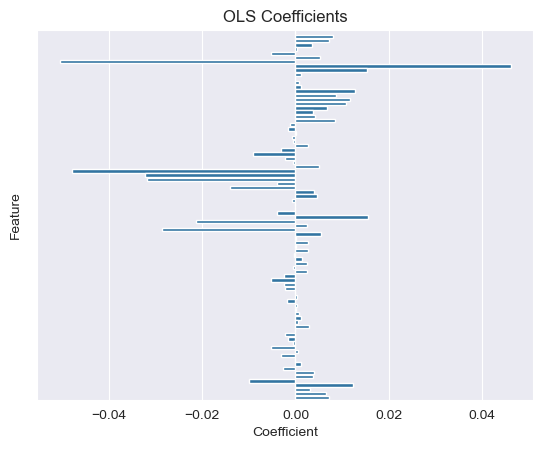

In [26]:
lin_reg_data = pd.DataFrame([lin_model.coef_, X.columns]).T # make a dataframe from the arrays
lin_reg_data.columns = ['Coefficient', 'Feature'] 

ax = sns.barplot(x="Coefficient",                           
                 y="Feature",                               
                 data=lin_reg_data)  
ax.set_title("OLS Coefficients")
plt.gca().set_yticklabels([])
plt.show()

#### Model 2:  Ridge Regression 

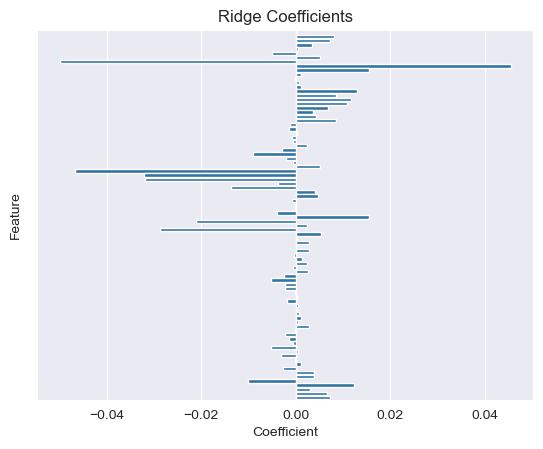

In [27]:
#
# Model 2 training

ridge_reg = Ridge(alpha=0.001)                                            
ridge_model = ridge_reg.fit(X_train, y_train) 

ridge_reg_data = pd.DataFrame([ridge_model.coef_, X.columns]).T 
ridge_reg_data.columns = ['Coefficient', 'Feature'] 

ax = sns.barplot(x="Coefficient",                           
                 y="Feature",                               
                 data=ridge_reg_data)  
ax.set_title("Ridge Coefficients")
plt.gca().set_yticklabels([])
plt.show()

#### Model 3:  Lasso Regression 

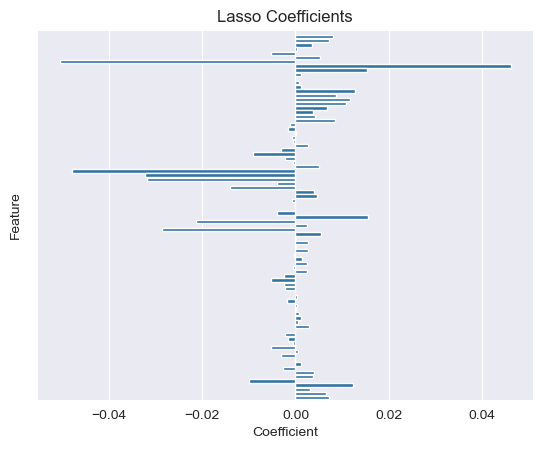

In [28]:
#
# Model 3 training
lasso_reg = Lasso(max_iter=15000)  # note the hypterparameter tuning will not converge with max_iter < 15000
lasso_model = lasso_reg.fit(X_train, 
                            y_train)

lasso_reg_data = pd.DataFrame([lasso_model.coef_, X.columns]).T  
lasso_reg_data.columns = ['Coefficient', 'Feature'] 

ax = sns.barplot(x="Coefficient",                           
                 y="Feature",                               
                 data=lin_reg_data)  
ax.set_title("Lasso Coefficients")
plt.gca().set_yticklabels([])
plt.show()

## 5. Validate and Refine Models

### 5.1 Predict on the validation set
Using each of the models you trained, predict outcomes in the validation set. Evaluate how well each model did.

In [29]:
#
# Predict on validation data
from sklearn.metrics import mean_squared_error

# OLS model
lin_pred = lin_model.predict(X_validate)

# calculate root mean squared errror
print('OLS model RMSE is', mean_squared_error(lin_pred,
                   y_validate,
                   squared = False) )

# Ridge model
ridge_pred = ridge_model.predict(X_validate)

# calculate the rmse for the Ridge model
print('Ridge model RMSE is', mean_squared_error(ridge_pred,
                   y_validate,
                   squared = False))

# Lasso model
lasso_pred = lasso_model.predict(X_validate)

# calculate the rmse for the LASSO model
print('Lasso model RMSE is', mean_squared_error(lasso_pred,
                   y_validate,
                   squared = False) )


OLS model RMSE is 0.02163098666274918
Ridge model RMSE is 0.021609661480128408
Lasso model RMSE is 0.026013508613541243


/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Before hyperparameter tuning, all three models have similar accuracy, around 0.2 RMSE. 

In [30]:
# Hyperparameter tuning with Grid Search

# liner model train/validation split
param_grid = {'fit_intercept': [True, False]}
lin_grid_reg = GridSearchCV(estimator  = lin_reg,     
                            param_grid = param_grid,   
                            cv=3) 
lin_grid_reg.fit(X_train, y_train)
best_index = np.argmax(lin_grid_reg.cv_results_["mean_test_score"]) 
best_lin_pred = lin_grid_reg.best_estimator_.predict(X_validate)  
print(lin_grid_reg.cv_results_["params"][best_index])
print("Metrics for linear model are:")
print('Best CV R^2:', max(lin_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', lin_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', mean_squared_error(best_lin_pred, y_validate,squared = False))

# Ridge model train/validation split
param_grid = {'alpha': np.arange(.1, 1, .1),
              'fit_intercept': [True, False],
              'solver': ['auto', 'svd', 'cholesky', 'lsqr']}
ridge_grid_reg = GridSearchCV(ridge_reg,  
                              param_grid, 
                              cv=3) 
ridge_grid_reg.fit(X_train, y_train)
best_index = np.argmax(ridge_grid_reg.cv_results_["mean_test_score"]) 
best_ridge_pred = ridge_grid_reg.best_estimator_.predict(X_validate)   
print("Metrics for ridge model are:") 
print(ridge_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(ridge_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', ridge_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', mean_squared_error(best_ridge_pred, y_validate, squared=False))

# Lasso model train/validation split
param_grid = {'alpha': np.arange(.1, 1, .1),
              'fit_intercept': [True, False],
              'selection': ['cyclic', 'random']}
lasso_grid_reg = GridSearchCV(lasso_reg,  
                              param_grid, 
                              cv=3)       
lasso_grid_reg.fit(X_train, y_train)
best_index = np.argmax(lasso_grid_reg.cv_results_["mean_test_score"]) 
best_lasso_pred = lasso_grid_reg.best_estimator_.predict(X_validate)   
print("Metrics for lasso model are:")
print(lasso_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(lasso_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', lasso_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', mean_squared_error(best_lasso_pred, y_validate, squared=False))


{'fit_intercept': True}
Metrics for linear model are:
Best CV R^2: 0.4637506895409309
Validation R^2: 0.3092099941075973
Validation RMSE 0.02163098666274918


/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Metrics for ridge model are:
{'alpha': 0.9, 'fit_intercept': True, 'solver': 'auto'}
Best CV R^2: 0.47769968535155005
Validation R^2: 0.4232351876406103
Validation RMSE 0.019765266985066404


/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Metrics for lasso model are:
{'alpha': 0.1, 'fit_intercept': True, 'selection': 'cyclic'}
Best CV R^2: -0.0012865425853822627
Validation R^2: 0.001292167120310883
Validation RMSE 0.026008932928432527


/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


After hyperparameter tuning, it appears as though the ridge regression model performed the best, with a validation RMSE of 0.019. 

### 5.2 Predict on the test set

Now, choose your best performing model of the three, select out unimportant feature(s), retrain the model, and then predict on the test set. 

In [33]:
#
# Predict using your best model

# training best perfoming model
                                        
final_ridge_model = ridge_grid_reg.best_estimator_.fit(X_train, y_train) 

# create a dataframe with the coefficient and feature names for plotting
final_ridge_reg_data = pd.DataFrame([final_ridge_model.coef_, X.columns]).T 
final_ridge_reg_data.columns = ['Coefficient', 'Feature'] 

# Best Ridge model prediction on test set
best_pred = final_ridge_model.predict(X_test)
print('Best CV R^2:', max(ridge_grid_reg.cv_results_["mean_test_score"]))
print('Test R^2:', ridge_grid_reg.score(X_test, y_test))
print('Test RMSE', mean_squared_error(best_pred, y_test, squared=False))


Best CV R^2: 0.47769968535155005
Test R^2: 0.42559877251648437
Test RMSE 0.020888308894957706


/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [39]:

# finding the features with the largest coefficients (most positive and most negative)

importances = final_ridge_reg_data.sort_values('Coefficient',
                                      ascending=False)
print(importances.head())
print(importances.tail())

   Coefficient                                            Feature
84     0.01162  sex and age_total population_65 years and over...
1     0.007998                                     Obesity_Number
2     0.007176                         Physical_Inactivity_Number
87    0.007176                                   Region_Southeast
86     0.00655                                       Region_South
   Coefficient                                            Feature
29   -0.005992  race_total population_two or more races_white ...
27    -0.00653     race_total population_one race_some other race
47   -0.007524  hispanic or latino and race_total population_n...
83   -0.009212  sex and age_total population_65 years and over...
35   -0.017465  race alone or in combination with one or more ...


By using both validation and test sets we can be assured that our models are not overfit to our training/validation data and therefore that they can be used to predict the outcomes of unseen data. In social science and public policy, model predictions on new data can be important for shaping policy outcomes, so we do not want our models to be overfit (i.e., reflecting the idiosyncricies of the training/validation data). Even if we split the data between training and validation sets, when we start looking for the best hyperparameters, we risk overfitting if we do not also have a test set that we hold out into the very end. 

(-0.05, 0.05)

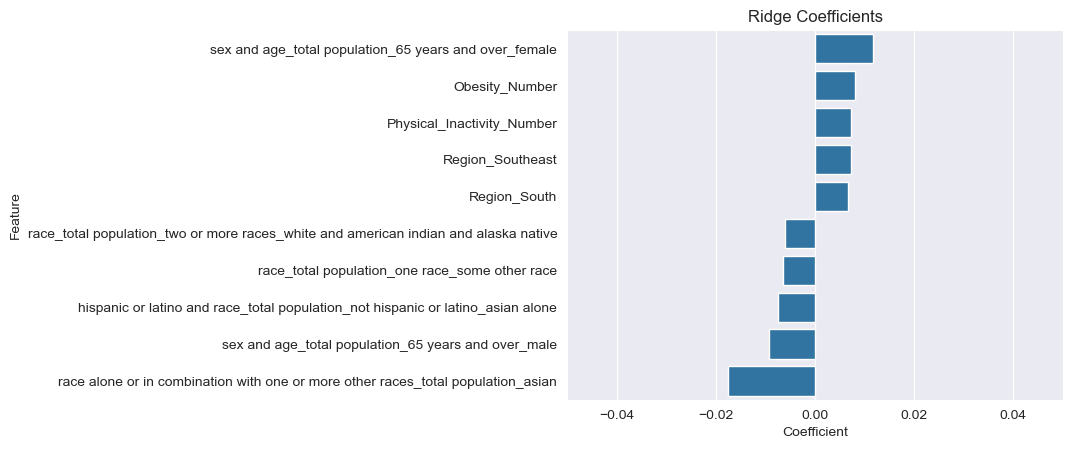

In [46]:
# Mapping coefficients 

# getting dataframe with only the top ten most important coefficients
positive = importances.head(5)
negative = importances.tail(5)
top_ten_features = pd.concat([positive, negative])

figure = plt.figure()                           
figure.subplots_adjust(wspace = .8, hspace=.5)   

# specify barplot for Ridge
sns.barplot(x="Coefficient", 
            y="Feature", 
            data=top_ten_features).set_title("Ridge Coefficients")

# ensure the x-axis is the same on both plots
plt.xlim(-0.05,0.05)

### 5.3 Impement a cross-validation approach

Finally, implement a cross-validation approach for your best model and evaluate the results.

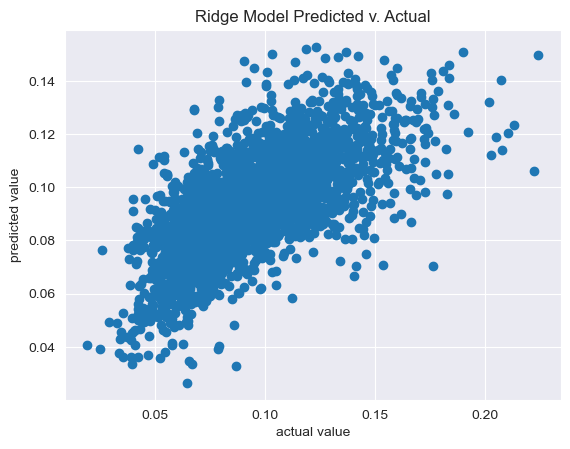

The RMSE of my cross-validated best model is 0.02048399931785696


/opt/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [33]:
#
# Run cross-validation

# load libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

final_pred = cross_val_predict(estimator = ridge_grid_reg.best_estimator_,        
                             X = X,                 
                             y = y,                     
                             cv = 5) 

plt.scatter(y, final_pred)                   
plt.title('Ridge Model Predicted v. Actual')  
plt.xlabel('actual value')                        
plt.ylabel('predicted value')                        
plt.show() 

print("The RMSE of my cross-validated best model is", mean_squared_error(final_pred,y, squared=False))




The RMSE of the cross-validation approach above is very similar to the RMSE's of the OLS, ridge, and lasso models trained above. When doing cross-validation is important to chose an appropriate k (number of folds). Lower ks have lower computational costs, higher bias, and lower variance (i.e. less overfitting). In contrast, higher ks have higher computational costs, lower bias, and higher variance (more overfitting). When choosing a k, you should consider the size of your dataset. If you do not have a very big dataset, you should choose a smaller k in order to prevent overfitting. 

## 6. Discussion Questions

In this section, insert responses for discussion questions here.

1. What is bias-variance tradeoff? Why is it relevant to machine learning problems like this one?

The bias-variance tradeoff is a basic concept in machine learning. It states that when training a predictive model, there will always be the need to balance between two sources of error. Error from bias occurs when model are too simple and does not match the underlying patterns of the data very well. High bias means that the model is underfit. Error from variance emerges from the opposite issue. It happens when the model is too complex and it is reflecting idiosyncricies in the data. High variance means the model is overfit.

Overfitting is a common problem in machine learning. When there is a lot of data available to a ML algorithm it is likely that models can become to complex and overfit the data. The problem of overfitting can be resolved in several ways such as through regularization (e.g. ridge and lasso penalties). 

Overfitting is relevant to the problem pursued in this dataset because if the ML algorithm selected to predict diabetes cases is overfit to the training data, predictions about what parts of the population are most at risk of diabetes are likely to be inaccurate, and this inaccuracy would have negative consequencs for polocy outcomes. 

2. Define overfitting, and why it matters for machine learning. How can we address it?

Overfitting happens when a ML algorithm is too complex and it is reflecting idiosyncricies in the trianing data. We can address overfitting in various ways. Most importantly, overfitting is addressed by splitting the data into train/validation/test splits. If the validation and test prediction errors are very different, then it is likely that overfitting occurred and the model should be made to be simpler. As this project shows, penalties for large feature coefficients can be applied via ridge and lasso regularization methods in order to minimize overfitting. Moreover, cross-validation can ensure that overfitting does not happen, as all of the data is used in different train/validate splits. 

3. Discuss your analysis in 2-3 paragraphs. Discuss your findings and recommendations. Which counties or regions would you prioritize for the pilot program? Would your answers change based on whether you want to take into account certain features such as race, gender, or age composition in the county? How confident would you be deploying this sort of model in a real-world application – why or why not?

The results of this project are best gathered from the penultimate boxplot figure laying out the top ten most important feature coefficients of the final ridge model. The five features with the most positive coefficients are, in order of importance: (1) women older than 65; (2) obesity; (3) physical inactivity; (4) the southeast region; and (5) the south region. I did not predict that the most important feature for predicting diabetes would correspond to older women. This finding suggests that older women are more at risk of diabetes than other parts of the population. Policy makers should take this into account. Perhaps policies geared toward middle aged women warning them of the risks of diabetes and providing preventative care should be advised. 

The most negative coefficients of the ridge model are, in order of importance: (1) asian race; (2) men older than 65; (3) asian race (not hispanic or latino); (4) other race; and (5) white and american indian and alaska native race. Thus it appears individuals of some races, particualrly asian, are less prone to getting diabetes. This may suggest that there are some lifestyle elements (e.g. diet, physical activity) that are not associated with diabetes and yet are associated with individuals of these racial groups. More resarch should be done to expound this connection between race and diabetes. If the mechanism between low risk for diabetes and race could be further elucidated, more preventative policies could be designed and implemented. Finally, it is curious that older men are less susceptible to diabetes than older women. Given the higher mortality rate of men, perhaps only men of a baseline health are making it to old age, and perhaps men of these characteristics are less likely to get diabetes. More research should be done to elucidate this gender variation. 

In concluding, it is important to note that the coefficients for these features are all very small (less than 0.02). Simpler models that are more informed by theory would likely provide better results that are more applicable to policy design. 
